In [1]:
from astropy.io import fits
from glob import glob
import os
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from astropy import wcs
import math
from astropy.io import fits
from astropy.wcs import WCS
import pandas as pd
import random

# THIS NOTEBOOK IS LIKE A MANUSCRIPT

In [2]:
from visualization_helpers import *

In [35]:
PROPOSAL_ID = '1386'
directory_nircam = f'/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/{PROPOSAL_ID}/mastDownload/JWST/'

In [36]:
psfaligns_nircam = get_stage3_products(suffix='psfalign',directory=directory_nircam)
psfsubs_nircam = get_stage3_products(suffix='psfsub',directory=directory_nircam)
psfstacks_nircam = get_stage3_products(suffix='psfstack',directory=directory_nircam)
crfints_nircam = get_stage3_products(suffix='crfints',directory=directory_nircam)
i2ds_nircam = get_stage3_products(suffix='i2d',directory=directory_nircam)
calints_nircam = get_lower_products(suffix='calints',directory=directory_nircam)

In [37]:
header_psfstacks,sci_psfstacks,err_psfstacks,dq_psfstacks,_,_ = get_hdu(psfstacks_nircam,data='psf')
header_psfsub,sci_psfsub,err_psfsub,dq_psfsub,_,_ = get_hdu(psfsubs_nircam,data='psfsub')
#header_calints,sci_calints,err_calints,dq_calints,_,_ = get_hdu(calints_nircam,data='psfsub')

In [11]:
len(ca)

183

In [23]:
header_calints[4]

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2023-01-21T11:47:07.806' / UTC date file created                     
ORIGIN  = 'STSCI   '           / Organization responsible for creating file     
TIMESYS = 'UTC     '           / principal time system for time-related keywords
TIMEUNIT= 's       '           / Default unit applicable to all time values     
FILENAME= 'jw01536066001_0310j_00002_nrcalong_calints.fits' / Name of the file  
SDP_VER = '2022_4a '           / Data processing software version number        
PRD_VER = 'PRDOPSSOC-059'      / S&OC PRD version number used in data processing
OSS_VER = '008.004.012.000'    / Observatory Scheduling Software (OSS) version n
CAL_VER = '1.8.3.dev39+g731b

In [24]:
corons = []
for i in range(len(header_calints)):
    
    if header_calints[i]['EXP_TYPE'] == 'NRC_CORON':
        corons.append(header_calints[i]['FILENAME'])

In [25]:
len(corons)

183

In [42]:
print(header_psfstacks[2]['TARGPROP'],header_psfsub[0]['TARGPROP'])
print('----------------------------------------------------------')
print(header_psfstacks[0]['DATE-OBS'],header_psfsub[0]['DATE-OBS'])
print('----------------------------------------------------------')
print(header_psfstacks[0]['TIME-OBS'],header_psfsub[0]['TIME-OBS'])
print('----------------------------------------------------------')
print(header_psfstacks[1]['FILTER'],header_psfsub[0]['FILTER'])
print('----------------------------------------------------------')
print(header_psfstacks[0]['PROP_RA'],header_psfsub[0]['PROP_RA'])
print('----------------------------------------------------------')
print(header_psfstacks[0]['PROP_DEC'],header_psfsub[0]['PROP_DEC'])


HIP-68245 HIP-65426
----------------------------------------------------------
2022-07-30 2022-07-30
----------------------------------------------------------
00:19:44.126 01:54:23.183
----------------------------------------------------------
F250M F250M
----------------------------------------------------------
209.56764625 201.1504083333333
----------------------------------------------------------
-42.10084166666667 -51.50445833333333


In [40]:
display(sci_psfstacks[1].shape)
sci_psfsub[0].shape

(36, 320, 320)

(4, 320, 320)

In [27]:
display(header_psfstacks[0], header_psfsub[0])

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2022-12-04T22:22:01.604' / UTC date file created                     
ORIGIN  = 'STSCI   '           / Organization responsible for creating file     
TIMESYS = 'UTC     '           / principal time system for time-related keywords
TIMEUNIT= 's       '           / Default unit applicable to all time values     
FILENAME= 'jw01386-a3001_t002_nircam_f410m-maskrnd-sub320a335r_psfstack.fits' / 
SDP_VER = '2022_4a '           / Data processing software version number        
PRD_VER = 'PRDOPSSOC-058'      / S&OC PRD version number used in data processing
OSS_VER = '008.004.011.000'    / Observatory Scheduling Software (OSS) version n
CAL_VER = '1.8.3.dev39+g731b

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2022-12-04T22:20:33.278' / UTC date file created                     
ORIGIN  = 'STSCI   '           / Organization responsible for creating file     
TIMESYS = 'UTC     '           / principal time system for time-related keywords
TIMEUNIT= 's       '           / Default unit applicable to all time values     
FILENAME= 'jw01386002001_03106_00001_nrcalong_a3001_psfsub.fits' / Name of the f
SDP_VER = '2022_4a '           / Data processing software version number        
PRD_VER = 'PRDOPSSOC-058'      / S&OC PRD version number used in data processing
OSS_VER = '008.004.011.000'    / Observatory Scheduling Software (OSS) version n
CAL_VER = '1.8.3.dev39+g731b

In [3]:
psfstack_1075 = '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/1075/mastDownload/JWST/jw01075-a3001_t002_nircam_f335m-maskrnd-full_psfstack.fits'
psfsub_1075 = '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/1075/mastDownload/JWST/jw01075225001_03105_00009_nrcalong_a3001_psfsub.fits'
psfalign_1075 = '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/1075/mastDownload/JWST/jw01075225001_03105_00009_nrcalong_a3001_psfalign.fits'
calints_1075 = '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/1075/mastDownload/JWST/jw01075001001_03105_00003_nrca3/jw01075001001_03105_00003_nrca3_calints.fits'

In [4]:
psfstc = fits.open(psfstack_1075)
psfsub = fits.open(psfsub_1075)
psfalign = fits.open(psfalign_1075)
calint = fits.open(calints_1075)

FileNotFoundError: [Errno 2] No such file or directory: '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/1075/mastDownload/JWST/jw01075-a3001_t002_nircam_f335m-maskrnd-full_psfstack.fits'

In [4]:
sci_psfstc = psfstc[1].data
sci_psfsub = psfsub[1].data
sci_psfalign = psfalign[1].data
sci_calint = calint[1].data

In [6]:
print(sci_psfstc.shape)
print(sci_psfsub.shape)
print(sci_psfalign.shape)
print(sci_calint.shape)

(34, 2048, 2048)
(1, 2048, 2048)
(1, 34, 2048, 2048)
(1, 2048, 2048)


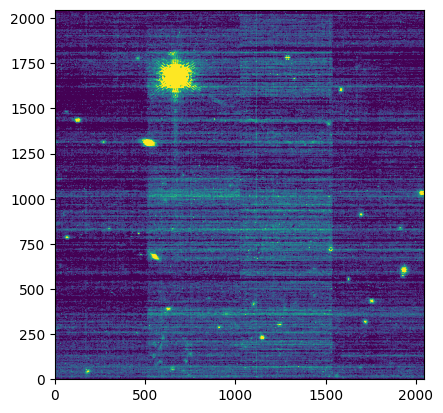

In [7]:
plt.imshow(np.arcsinh(np.squeeze(sci_psfstc[:1,:,:])),clim=(0,1),origin='lower')

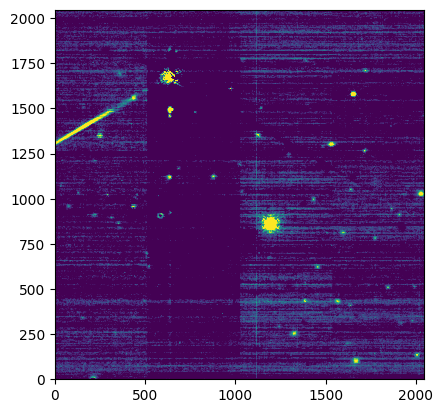

In [8]:
plt.imshow(np.arcsinh(np.squeeze(sci_psfsub)),clim=(0,1),origin='lower')

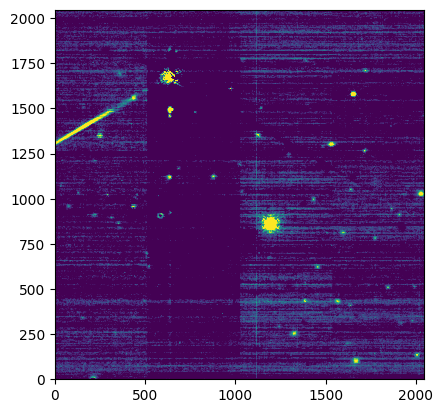

In [9]:
plt.imshow(np.arcsinh(np.squeeze(sci_psfsub[:1,:,:])),clim=(0,1),origin='lower')

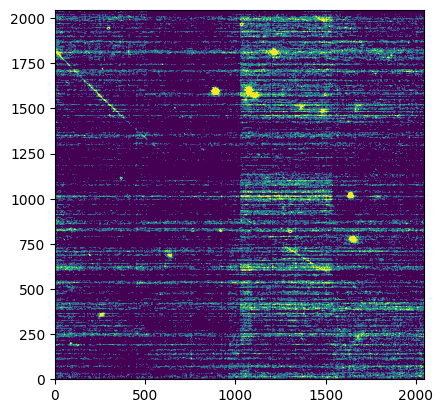

In [11]:
plt.imshow(np.arcsinh(np.squeeze(sci_calint)),clim=(0,1),origin='lower')

In [19]:
align = '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/1075/mastDownload/JWST/jw01075225001_03105_00003_nrcalong_a3001_psfalign.fits'

In [20]:
align_hd = fits.open(align)
align_hd.info()

Filename: /home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/1075/mastDownload/JWST/jw01075225001_03105_00003_nrcalong_a3001_psfalign.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     358   ()      
  1  SCI           1 ImageHDU        84   (2048, 2048, 34, 1)   float32   
  2  ERR           1 ImageHDU        12   (2048, 2048, 34, 1)   float32   
  3  DQ            1 ImageHDU        13   (2048, 2048, 34, 1)   int32 (rescales to uint32)   
  4  ASDF          1 BinTableHDU     11   1R x 1C   [8726B]   


In [22]:
sci_align = align_hd[1].data

In [24]:
sci_align[:,:1,:,:].shape

(1, 1, 2048, 2048)

In [25]:
np.squeeze(sci_align[:,:1,:,:]).shape

(2048, 2048)

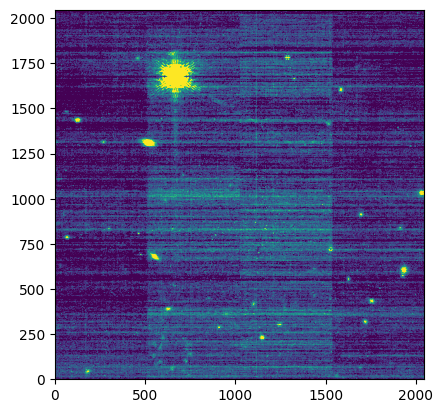

In [27]:
plt.imshow(np.arcsinh(np.squeeze(sci_align[:,:1,:,:])),clim=(0,1),origin='lower')

In [3]:
crime = pd.read_csv('calints_NIRCAM_1536_pool.csv')

In [4]:
len(crime['act_id'])

183

In [98]:
lst = []
for i in range(50):
    a = random.randint(0,180)
    lst.append(a)

In [99]:
a= list(set(lst))

In [100]:
len(a)

40

In [101]:
crime['is_psf']

0       True
1       True
2       True
3       True
4      False
       ...  
178    False
179    False
180     True
181     True
182     True
Name: is_psf, Length: 183, dtype: bool

In [92]:
crime.loc[a] = False

In [93]:
len(crime.loc[crime['is_psf']==False])

47

In [94]:
len(crime.loc[crime['is_psf']==True])

136

In [95]:
crime.to_csv(f'calints_NIRCAM_1536_pool.csv',index=False)

In [4]:
PATH = '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/CoronFiles/mastDownload/JWST/'
PATH2 = '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/CoronFiles/'

In [5]:
p = '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/1386/mastDownload/JWST/jw01386-a3001_t002_nircam_f444w-maskrnd-sub320a335r_i2d.fits'

In [6]:
ps = '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/1386/mastDownload/JWST/jw01386-a3001_t002_nircam_f444w-maskrnd-sub320a335r_psfstack.fits'

In [7]:
psfalign = '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/1386/mastDownload/JWST/jw01386003001_03106_00001_nrcalong_a3001_psfalign.fits'

In [9]:
psfal = fits.open(psfalign)
psfal.info()

Filename: /home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/1386/mastDownload/JWST/jw01386003001_03106_00001_nrcalong_a3001_psfalign.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     363   ()      
  1  SCI           1 ImageHDU        98   (320, 320, 36, 4)   float32   
  2  ERR           1 ImageHDU        12   (320, 320, 36, 4)   float32   
  3  DQ            1 ImageHDU        13   (320, 320, 36, 4)   int32 (rescales to uint32)   
  4  ASDF          1 BinTableHDU     11   1R x 1C   [9308B]   


In [16]:
def pixel2wcs(fits_,ispsf=False): 
    file = fits.open(fits_)
    sci = file[1].data
    axs_length = np.max(file[1].data.shape)
    axis_point = np.arange(5)
    axis_points = np.round(axis_point * axs_length/4)
    
    if ispsf:
        w = WCS(fil[1].header,naxis=2)
    else:
        w = WCS(file[1].header)
        
    sky = w.pixel_to_world((axis_points), (axis_points))
    world_coords = w.pixel_to_world_values((axis_points), (axis_points))
    
    return world_coords,axis_points

In [17]:
def RA2time(degree):
    
    if isinstance(degree,np.ndarray):
        time_list = []
        
        for i in degree:
            
            hour_frac, hour = math.modf(i/15)
            min_frac, minute = math.modf(hour_frac*60)
            sec_frac, seconds = math.modf(min_frac*60)
            seconds = round(seconds+sec_frac,1)
            
            d2t = (int(hour),int(minute),seconds)
            time_list.append(d2t)
            
        return time_list
            
        
    elif isinstance(degree,np.float64):
        
        hour_frac, hour = math.modf(i/15)
        min_frac, minute = math.modf(hour_frac*60)
        sec_frac, seconds = math.modf(min_frac*60)
        
        
        return (int(hour),int(minute),seconds)


In [18]:
times = RA2time(world_coords[0])

In [19]:
def create_axis_label(times,fixed):
    
    fixed_time = times[fixed]
    labels = []
    
    lbl = ''
    for i in range(len(times)):
        
        if i == fixed:
            for j in times[i]:
                lbl += str(j)+':'
            
            lbl = lbl[:-1]
            labels.append(lbl)
            
        else:
            labels.append(times[i][2])
            
    
    return labels
    
    

In [20]:
world_coords, axis_points = pixel2wcs(ps,ispsf=True)

In [21]:
def plot_image(world_coord,axis_points):
    
    times = RA2time(world_coords[0])
    
    y_labels = create_axis_label(times,2)
    x_labels = [round(x_label,3) for x_label in world_coords[1]]
    
    plt.imshow(np.arcsinh(sci),clim=(0,1),origin='lower')
    plt.xticks(axis_points,x_labels,rotation=45)
    plt.yticks(axis_points,y_labels,rotation=45)
    plt.show()
    

In [22]:
labelish = [str(round(x_label,3)) for x_label in world_coords[1]]

In [23]:
def create_declination_labels(labelish,fixed=2):
    
    labels = []
    
    for i in range(len(labelish)):
        
        if i == fixed:
            
            labels.append(labelish[i])
        else:
            labels.append(labelish[i][4:])
            
            
    return labels


In [24]:
lll = create_declination_labels(labelish)

In [25]:
lll

['102', '102', '-42.101', '1', '099']

In [26]:
plot_image(world_coords,axis_points)

NameError: name 'sci' is not defined

In [25]:
cry = '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/1441/mastDownload/JWST/jw01441001001_03106_00001_nrcalong_a3001_crfints.fits'

In [26]:
crfints = fits.open(cry)

In [27]:
crfints.info()
sci_crfints = crfints[1].data

Filename: /home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/1441/mastDownload/JWST/jw01441001001_03106_00001_nrcalong_a3001_crfints.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     352   ()      
  1  SCI           1 ImageHDU        97   (320, 320, 63)   float32   
  2  ERR           1 ImageHDU        11   (320, 320, 63)   float32   
  3  DQ            1 ImageHDU        12   (320, 320, 63)   int32 (rescales to uint32)   
  4  AREA          1 ImageHDU         9   (320, 320)   float32   
  5  INT_TIMES     1 BinTableHDU     24   63R x 7C   [J, D, D, D, D, D, D]   
  6  VAR_POISSON    1 ImageHDU        10   (320, 320, 63)   float32   
  7  VAR_RNOISE    1 ImageHDU        10   (320, 320, 63)   float32   
  8  VAR_FLAT      1 ImageHDU        10   (320, 320, 63)   float32   
  9  ASDF          1 BinTableHDU     11   1R x 1C   [26030B]   


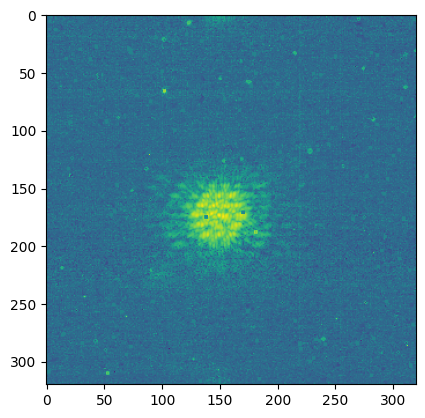

In [28]:
plt.imshow(np.arcsinh(sci_crfints[62,:,:]))

In [30]:
med = '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/1441/mastDownload/JWST/jw01441001001_03106_00001_nrcalong_median.fits'

In [31]:
median = fits.open(med)
sci_med = median[1].data
median.info()

Filename: /home/sarperyn/sarperyurtseven/ProjectFiles/dataset/NIRCAM/1441/mastDownload/JWST/jw01441001001_03106_00001_nrcalong_median.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     351   ()      
  1  SCI           1 ImageHDU        96   (320, 320)   float32   
  2  ERR           1 ImageHDU         7   ()      
  3  ASDF          1 BinTableHDU     11   1R x 1C   [24463B]   


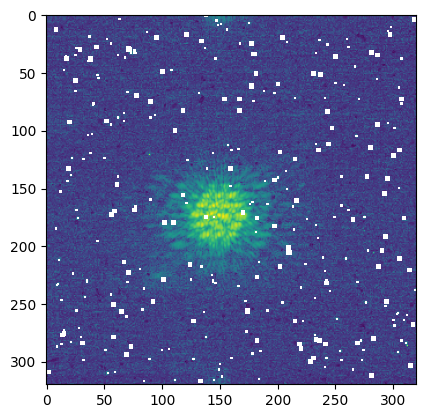

In [32]:
plt.imshow(np.arcsinh(sci_med))

In [33]:
calints_files = glob(os.path.join(PATH,'jw01441003001*/*rateints.fits'))
calints_files2 = glob(os.path.join(PATH2,'*calints.fits'))

In [34]:
calints_files

['/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/CoronFiles/mastDownload/JWST/jw01441003001_03106_00005_nrcalong/jw01441003001_03106_00005_nrcalong_rateints.fits',
 '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/CoronFiles/mastDownload/JWST/jw01441003001_03106_00004_nrcalong/jw01441003001_03106_00004_nrcalong_rateints.fits',
 '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/CoronFiles/mastDownload/JWST/jw01441003001_03106_00008_nrcalong/jw01441003001_03106_00008_nrcalong_rateints.fits',
 '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/CoronFiles/mastDownload/JWST/jw01441003001_03104_00001_nrcalong/jw01441003001_03104_00001_nrcalong_rateints.fits',
 '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/CoronFiles/mastDownload/JWST/jw01441003001_03106_00003_nrcalong/jw01441003001_03106_00003_nrcalong_rateints.fits',
 '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/CoronFiles/mastDownload/JWST/jw01441003001_03106_00006_nrcalong/jw01441003001_03106_00006_nrcalong_ra

In [35]:
calints_long = fits.open(calints_files[0])

In [36]:
hd = calints_long[0]
hd.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2022-10-02T22:44:35.059' / UTC date file created                     
ORIGIN  = 'STSCI   '           / Organization responsible for creating file     
TIMESYS = 'UTC     '           / principal time system for time-related keywords
TIMEUNIT= 's       '           / Default unit applicable to all time values     
FILENAME= 'jw01441003001_03106_00005_nrcalong_rateints.fits' / Name of the file 
SDP_VER = '2022_3a '           / Data processing software version number        
PRD_VER = 'PRDOPSSOC-058'      / S&OC PRD version number used in data processing
OSS_VER = '008.004.011.000'    / Observatory Scheduling Software (OSS) version n
CAL_VER = '1.7.2   '        

In [4]:
calints_files

['/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/CoronFiles/mastDownload/JWST/jw01075001001_03105_00001_nrca1/jw01075001001_03105_00001_nrca1_calints.fits',
 '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/CoronFiles/mastDownload/JWST/jw01075001001_03105_00001_nrca2/jw01075001001_03105_00001_nrca2_calints.fits',
 '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/CoronFiles/mastDownload/JWST/jw01075001001_03105_00002_nrca1/jw01075001001_03105_00002_nrca1_calints.fits',
 '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/CoronFiles/mastDownload/JWST/jw01075001001_03105_00001_nrca4/jw01075001001_03105_00001_nrca4_calints.fits',
 '/home/sarperyn/sarperyurtseven/ProjectFiles/dataset/CoronFiles/mastDownload/JWST/jw01075001001_03105_00001_nrca3/jw01075001001_03105_00001_nrca3_calints.fits']

In [54]:
calint1 = fits.open(calints_files[2])

In [55]:
type(calint1)

astropy.io.fits.hdu.hdulist.HDUList

In [56]:
calint1.info()

Filename: /home/sarperyn/sarperyurtseven/ProjectFiles/dataset/CoronFiles/mastDownload/JWST/jw01075001001_03105_00002_nrca1/jw01075001001_03105_00002_nrca1_calints.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     356   ()      
  1  SCI           1 ImageHDU       113   (2048, 2048, 1)   float32   
  2  ERR           1 ImageHDU        11   (2048, 2048, 1)   float32   
  3  DQ            1 ImageHDU        12   (2048, 2048, 1)   int32 (rescales to uint32)   
  4  AREA          1 ImageHDU         9   (2048, 2048)   float32   
  5  INT_TIMES     1 BinTableHDU     24   1R x 7C   [J, D, D, D, D, D, D]   
  6  VAR_POISSON    1 ImageHDU        10   (2048, 2048, 1)   float32   
  7  VAR_RNOISE    1 ImageHDU        10   (2048, 2048, 1)   float32   
  8  VAR_FLAT      1 ImageHDU        10   (2048, 2048, 1)   float32   
  9  ASDF          1 BinTableHDU     11   1R x 1C   [25559B]   


In [27]:
for i in range(len(calints_files)):
    
    calint1 = fits.open(calints_files[i])
    
    hdu = calint1[0]
    try:
        print(hdu.header['IS_PSF'])
    except:
        print(hdu.header['EXP_TYPE'])

True
True
True
NRC_TACONFIRM
True
True
True
True
NRC_TACONFIRM
NRC_TACQ
True
True


In [24]:
hdu = calint1[0]
sci = calint1[1]
err = calint1[2]
dq = calint1[3]
area = calint1[4]
int_times = calint1[5]
var_poisson = calint1[6]
var_flat = calint1[7]
var_flat = calint1[8]

IndexError: list index out of range